## Domača naloga 1
### Marko Tacer, 23222087

V okviru domače naloge smo s pomočjo programov LabView in Python izvedli generacijo željenega signala in prikaz znotraj okolja jupyter notebook. S paketom lvm_read se uvažanje datoteke .lvm še dodatno poenostavi.Spodaj uvozimo knjižnici numpy in matplotlib.pyplot za osnovne operacije in prikaze. Dodatno uvozimo še lvm_read za branje našega signala. Prebrano shranimo kot "signal1", posamezne veličine pa dostopamo preko ti. ključev.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
file = 'Signal1.lvm'
signal1 = lvm_read.read(file)

$x$ komponente našega signala bi lahko zapisali v prvi stoplec že s programom LabView, a ker tega nimamo lahko generiramo array $x$ s pomočjo $koraka X$ in dolžine arraya samega signala (pri nas shranjen pod "p"). 

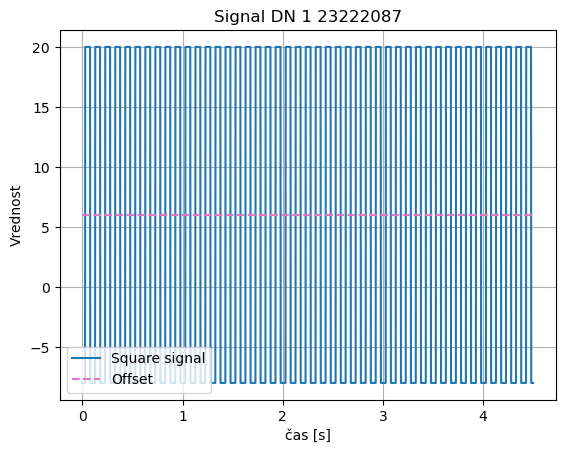

In [2]:
X_korak = signal1[0]['Delta_X'][0]              #preberemo korak (časovni)
p = np.array(signal1[0]['data'].flatten())      #preberemo podatke v array
x = np.arange(0, len(p) * X_korak, X_korak)     #definicija časovnih točk
avg = np.full((len(p), 1), np.average(p))       #samo da preverim, če je offset pravi

plt.title("Signal DN 1 23222087")
plt.xlabel("čas [s]")
plt.ylabel("Vrednost")
plt.plot(x, p, label="Square signal")
plt.plot(x, avg, 'C6--', label="Offset")
plt.grid()
plt.legend()
plt.show()

#### Dodatno

Sam sem se odločil, da se malce bolje spoznam s funkcijo $scipy.signal.convolve$. V preteklosti sem namreč delal konvolucijo s pomočjo $numpy.convolve$, a sem pred kratkim zasledil, da je reševanje s scipy hitrejše. Zato bom preveril, če je temu res tako.

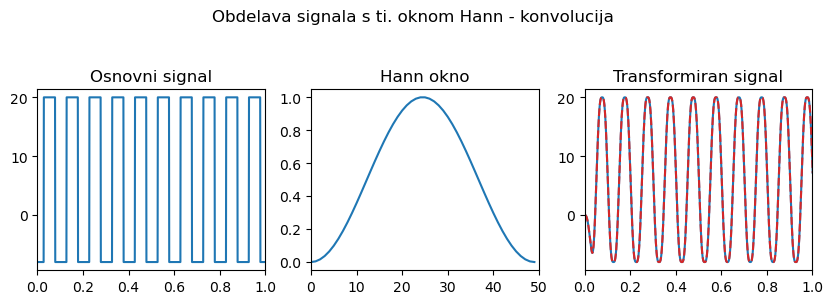

In [3]:
import scipy as sp
from scipy import signal
from scipy.signal import windows             #da bomo lahko uporabili okno za konvolucijo (namesto da definiramo svojo funkcijo)
A = 50
win = windows.hann(A)                       #izberemo eno izmed možnih funkcij = Hann, so pa še druge možnosti,
                                             #lahko bi jo definirali sami
filtered = signal.convolve(p, win)/sum(win)  #Naredimo konvolucijo s simpy
filtered2 = np.convolve(p, win)/sum(win)     #Naredimo konvolucijo s numpy

fig = plt.figure(figsize=(10, 8))
fig.suptitle("Obdelava signala s ti. oknom Hann - konvolucija")

plt.subplot(3,3,1)
plt.title("Osnovni signal")
plt.plot(x, p, 'C0', label="Square signal")
plt.xlim(0,1)

plt.subplot(3,3,2)
plt.title("Hann okno")
plt.plot(win, label="Impulzna prenosna funkcija")                                             #Dejansko nam Hann definira obliko, sami pa izbiramo širino "blura"
plt.xlim(0,A)

plt.subplot(3,3,3)
plt.title("Transformiran signal")
plt.plot(x, filtered[:4500], label='scipy')               #vidimo, da s scipy.signal.convolve in numpy.convolve dobimo enako
plt.plot(x, filtered2[:4500], 'C3--', label='numpy')
plt.xlim(0,1)
plt.show()

Kot vidimo je naša ti. "Impulzna prenosna funkcija" naredila "blur" efekt na osnovni signal. Sama konvolucija se mnogokrat uporablja prav za ta namen, tudi v primeru želje "bluranja" slik se lahko poslužimo različnih tipov konvolucije (tudi v 2D). Spodaj je za primerjavo narejeno še štopanje izvedbe operacije s numpy in scipy in vidimo, da je scipy za veliko ponovitev bistveno hitrejši. 

In [6]:
import time
A = 100000
st = time.time()
for i in range(A):
    signal.convolve(p, win)/sum(win)

et = time.time()
elapsed1 = et - st

st = time.time()
for i in range(A):
    np.convolve(p, win)/sum(win)

et = time.time()
elapsed2 = et - st
print("Za {A} ponovitev izračuna: ")
print(f'signal.convolve : {elapsed1:.3f} s')
print(f'numpy.convolve : {elapsed2:.3f} s')

Za {A} ponovitev izračuna: 
signal.convolve : 29.206 s
numpy.convolve : 28.074 s
